# TD Recherche dans un tableau, dichotomie et complexité

In [ ]:
# tableaux qu'on pourra utiliser pour tester les fonctions
tableau_1: list[int] = [2, 6, 8, 9, 15]
tableau_2: list[int] = [3, 4, 7, 16]
tableau_3: list[int] = [12]
tableau_4: list[int] = []

## Recherche dans un tableau

Implémenter la fonction suivante. La tester sur de petites entrées.

In [ ]:
def dans_tableau(x: int, valeurs: list[int]) -> bool:
    """Retourne Vrai si x est dans valeurs (faux sinon)"""

In [ ]:
print(dans_tableau(5, [2, 6, 8, 9, 15]))
print(dans_tableau(9, [2, 6, 8, 9, 15]))
print(dans_tableau(1, []))
print(dans_tableau(3, [2]))

## Recherche dans un tableau trié

Supposons que le tableau dans lequel on cherche est trié. Quelle optimisation peut-on faire ?

In [ ]:
def dans_tableau_trié(x: int, valeurs: list[int]) -> bool:
    """Retourne Vrai si x est dans valeurs (faux sinon). On suppose que les valeurs sont triées (dans l'ordre croissant)."""

# Benchmark des fonctions précédentes

## Fonctions utilitaires

On définit les fonctions
- `random_sorted_array`, qui permet de créer un tableau de manière aléatoire
- `affiche_valeurs`, qui permet d'afficher un graphe 

In [ ]:
import numpy as np
import random
import time

MAXINT = 2**32
rng = np.random.default_rng()

def tableau_aléatoire_trié(size: int, high=MAXINT):
    """Génère un tableau trié, de taille size"""
    rints = rng.integers(low=0, high=MAXINT, size=size)
    return np.sort(rints)

def entier_aléatoire():
    return random.randint(0, MAXINT)

In [ ]:
tableau_aléatoire_trié(5)

In [ ]:
entier_aléatoire()

In [ ]:
import matplotlib.pyplot as plt
def affiche_valeurs(**kwargs: list[tuple[int, int]]):
    """Affiche les valeurs passées en argument"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    for name, values in kwargs.items():
        xs = [value[0] for value in values]
        ys = [value[1] for value in values]
        ax.plot(xs, ys, "o-", label=name)
    fig.legend()
    ax.grid()
    ax.set_xlabel("Taille de l'entrée")
    ax.set_ylabel("Temps d'exécution (ms)")


# Exemple:
affiche_valeurs(
    fun1=[
        (1, 5), 
        (2, 10), 
        (4, 20)
    ],
    fun2=[
        (1, 4), 
        (2, 3), 
        (4, 30)
    ]
)

## Benchark des fonction `dans_tableau` et `dans_tableau_trié`

On va:
1. **Calculer le temps mis pas les fonction** `dans_tableau` et `dans_tableau_trié` pour des tableaux de taille
    - 10_000
    - 50_000
    - 100_000
    - 200_000
2. **Afficher le résultat**

3. **Bonus**: écrire une fonction

   ```python
   def benchmark_tri(fonction_recherche, taille: int) -> :
       """Prends en entrée une fonction de recherche et une taille
       Affiche le temps pris, en millisecondes, pour exécuter la fonction 
       sur une entrée aléatoire de taille donnée.
       Retourne ce temps
       """ 
   ```

### Mesures pour `dans_tableau`

Exemple: mesure pour un tableau de taille 1000

In [ ]:
TAILLE = 10_000
tableau = tableau_aléatoire_trié(TAILLE)
x = entier_aléatoire()

# Calcule le temps pris par l'exécution de dans_tableau
start_time = time.perf_counter_ns()
dans_tableau(x, tableau)
temps_ns = time.perf_counter_ns() - start_time
temps_ms = int(temps_ns / 1000)

print(f"Temps pour taille {TAILLE}: {temps_ms} ms")

### Mesures pour `dans_tableau_trié`

In [ ]:
TAILLE = 10_000
tableau = tableau_aléatoire_trié(TAILLE)
x = entier_aléatoire()

# Calcule le temps pris par l'exécution de dans_tableau
start_time = time.perf_counter_ns()
dans_tableau_trié(x, tableau)
temps_ns = time.perf_counter_ns() - start_time
temps_ms = int(temps_ns / 1000)

print(f"Temps pour taille {TAILLE}: {temps_ms} ms")

### Affichage des valeurs

In [ ]:
affiche_valeurs(
    dans_tableau=[
        (10_000, ...), 
        (50_000, ...), 
        (100_000, ...),
        (200_000, ...)
    ],
    dans_tableau_trié=[
        (10_000, ...), 
        (50_000, ...), 
        (100_000, ...),
        (200_000, ...)
    ]
)

# Recherche dichotomique

La recherche dichomotique est une technique de recherche dans un tableau trié. Elle consiste à regarder l'élément au centre du tableau; en fonction de la façon dont il se compare avec l'élément que l'on recherche, on continue la recherche dans la moitié droite ou gauche du tableau.

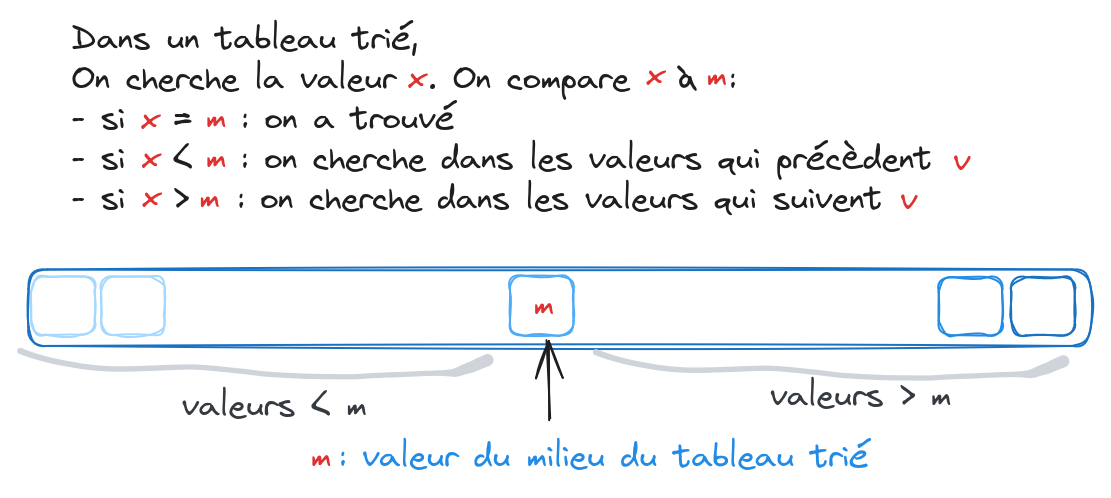

<!-- https://excalidraw.com/#json=92EsHNQbgXUZdKn5_yEl9,4w2eWyMEU1yQKbvf8MmaVQ -->

Nous allons maintenant implémenter un  algorithme de recherche par dichotomie, et regarder l'implication sur la performance en moyenne.

## Valeur du "milieu"

1. Quelle est la valeur du milieu dans les tableaux suivants:
    ```py
    tableau_1: list[int] = [2, 6, 8, 9, 15]
    tableau_2: list[int] = [3, 4, 7, 16]
    tableau_3: list[int] = [12]
    tableau_4: list[int] = []
    ```
2. Établir une fonction qui donne l'indice du milieu en fonction de la taille du tableau

In [ ]:
def indice_milieu(taille: int) -> int:
    """Retourne l'indice du milieu pour un tableau de taille n"""

In [ ]:
tableau_1 = [2, 6, 8, 9, 15]
indice_milieu = indice_milieu(tableau_1)
valeur_milieu = tableau_1[indice_milieu]
print(f"L'indice du milieu est {indice_milieu}, et la valeur du tableau est {valeur_milieu}")

In [ ]:
tableau_2 = [3, 4, 7, 16]
indice_milieu = indice_milieu(tableau_2)
valeur_milieu = tableau_1[indice_milieu]
print(f"L'indice du milieu est {indice_milieu}, et la valeur du tableau est {valeur_milieu}")

## Découpage de tableau

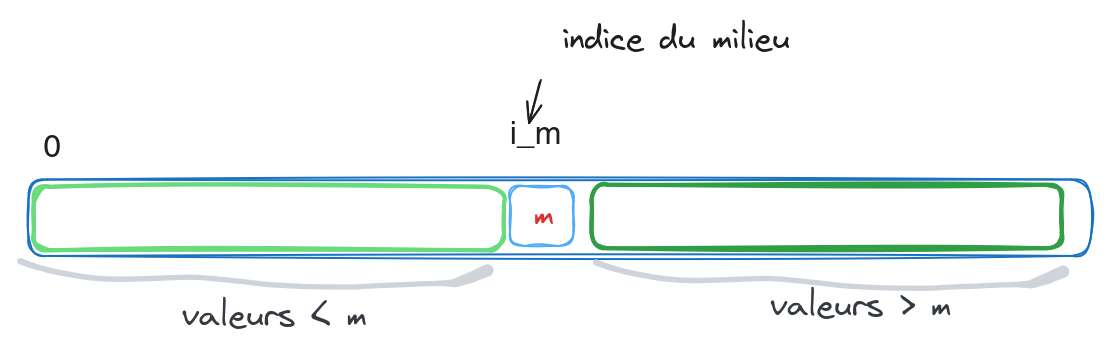

In [ ]:
def sépare_tableau(values: list[int]) -> tuple[list[int], list[int]]:
    """
    Renvoie les parties gauche et droite du tableau, sans la valeur du milieu
    """

In [ ]:
sépare_tableau(tableau_1)

In [ ]:
sépare_tableau(tableau_2)

## Recherche dichotomique

In [ ]:
def recherche_dichotomique(values: list[int], x: int) -> bool:
    """
    
    """
    valeurs_courantes: list[int} = values

    # on cherche l'indice du milieu
    i_m = ...

# Comparaison recherche dichotomique et recherche "naïve"

## Mesures pour `recherche_dichotomique`

## Affichage des valeurs